In [1]:
import pandas as pd
import numpy as np 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

board_location_df = pd.read_csv('board_stop_id_geo.csv')
alight_location_df = pd.read_csv('alight_stop_id_geo.csv')
poi_location_df = board_location_df.append(alight_location_df)
poi_location_df.head(3)

,Stop Id,Lat,Lon
0,100014,33.745587,-84.417784
1,908301,33.717300,-84.425030
2,100014,33.745587,-84.417784


In [3]:
print(poi_location_df.shape)

(66352, 3)


In [4]:
print ("Stop ID")
print ("Dataset shape (row, column): ", poi_location_df.shape)
print ("Minimum Longitude: ", poi_location_df['Lon'].min())
print ("Maximum Longitude: ", poi_location_df['Lon'].max())
print ("Minimum Latitude: ", poi_location_df['Lat'].min())
print ("Maximum Latitude: ", poi_location_df['Lat'].max())

Stop ID
Dataset shape (row, column):  (66352, 3)
Minimum Longitude:  -84.669803
Maximum Longitude:  -84.083455
Minimum Latitude:  33.506028
Maximum Latitude:  34.105609


In [5]:
poi_location_e = poi_location_df[['Lon', 'Lat']].values.tolist()

In [8]:
# from sklearn.neighbors import NearestNeighbors
# neigh = NearestNeighbors(n_neighbors=2)
# nbrs = neigh.fit(poi_location_e)
# distances, indices = nbrs.kneighbors(poi_location_e)
# distances, indices

In [9]:
# distances = np.sort(distances, axis=0)
# distances
# # distances = distances[:,1]
# # plt.plot(distances)

In [10]:
# plt.xlim([33173,33175])
# plt.plot(distances)

C:\Users\ningg\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\ningg\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\ningg\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ningg\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

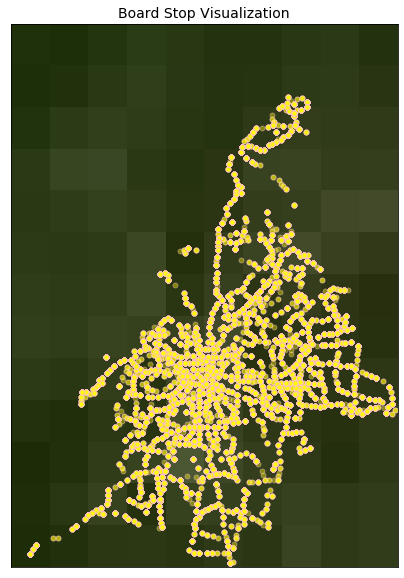

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
#print (matplotlib.__version__)
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)


llon=-84.7
ulon=-84.1
llat=33.5
ulat=34.2

# selecting the boundaries of the map from lattitude and longitude 

poi_location = poi_location_df[(poi_location_df['Lon'] > llon) & (poi_location_df['Lon'] < ulon) & 
                        (poi_location_df['Lat'] > llat) &(poi_location_df['Lat'] < ulat)]



my_map = Basemap(projection='merc',
            resolution = 'h', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='gray', ocean_color='skyblue')
#my_map.shadedrelief()
my_map.bluemarble()
#To collect data based on stations        

xs,ys = my_map(np.asarray(poi_location.Lon), np.asarray(poi_location.Lat))
poi_location['xm']= xs.tolist()
poi_location['ym'] =ys.tolist()

#Visualization1
for index,row in poi_location.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor ='yellow',markeredgecolor='pink', marker='o', markersize= 5, alpha = 0.4)
#plt.text(x,y,stn)
plt.title("Board Stop Visualization", fontsize=14)
# plt.savefig("morning_clusters.png", dpi=300)
plt.show()

In [26]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
poi_location_clus_taz = poi_location[['Lon', 'Lat', 'Stop Id']]
poi_location_clus_taz = StandardScaler().fit_transform(poi_location_clus_taz)

db = DBSCAN(eps=0.11, min_samples=50).fit(poi_location_clus_taz)
labels = db.labels_
print (labels[500:560])
poi_location["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[4 4 4 4 4 4 4 4 4 4 2 4 2 4 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 7 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


C:\Users\ningg\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


C:\Users\ningg\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\ningg\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Cluster 0, Average Longitude: -84.425965185237570, Average Latitude: 33.699048238233146
Cluster 1, Average Longitude: -84.425029999998811, Average Latitude: 33.71729999999969
Cluster 2, Average Longitude: -84.346759881822852, Average Latitude: 33.80182146239138
Cluster 3, Average Longitude: -84.506663325236663, Average Latitude: 33.709741724137864
Cluster 4, Average Longitude: -84.254904231767754, Average Latitude: 33.7166325895674
Cluster 5, Average Longitude: -84.47583116193255, Average Latitude: 33.60397654861699
Cluster 6, Average Longitude: -84.549810625192596, Average Latitude: 33.5872528325651
Cluster 7, Average Longitude: -84.440541999997757, Average Latitude: 33.67742400000077
Cluster 8, Average Longitude: -84.428767999999758, Average Latitude: 33.70088000000025
Cluster 9, Average Longitude: -84.389090492006259, Average Latitude: 33.57336455995267
Cluster 10, Average Longitude: -84.3491006258394510, Average Latitude: 33.917168048657786
Cluster 11, Average Longitude: -84.413653

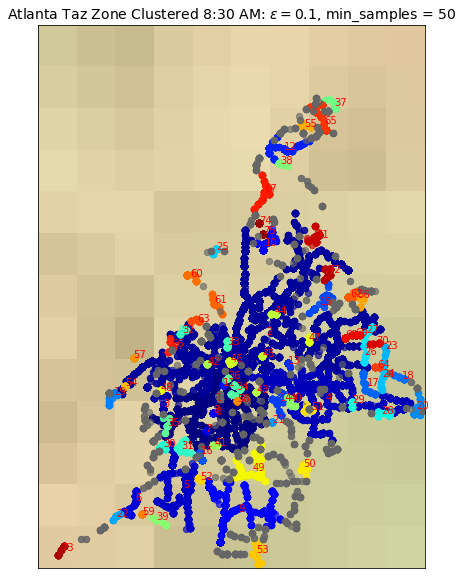

In [30]:
#Hack to fix missing PROJ4 env var
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

#mapping cluster centers
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import csv
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

Lon = []
Lat = []
#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = poi_location[poi_location.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=10, color='red',)
        print ("Cluster "+str(clust_number)+', Average Longitude: '+ str(np.mean(clust_set.Lon))+str(clust_number)+', Average Latitude: '+ str(np.mean(clust_set.Lat)))
        Lon.append(np.mean(clust_set.Lon))
        Lat.append(np.mean(clust_set.Lat))
plt.title(r"Atlanta Taz Zone Clustered 8:30 AM: $ \epsilon = 0.1$, min_samples = 50", fontsize=14)    
#plt.savefig("etopo_cluster.png", dpi=300)

#Write potential hub locations to csv files
hub_location = pd.DataFrame({'Lat':Lat, 'Lon':Lon})
hub_location.to_csv('hub_location_combined.csv', index=False)


In [31]:
import csv
with open('hub_location_combined.csv', 'r') as f:
    data1=[(float(line['Lon']),float(line['Lat'])) for line in  csv.DictReader(f)]
len(data1)


76

In [26]:
import csv
with open('board_stop_id_geo.csv', 'r') as f:
    data2=[(float(line['Lon']),float(line['Lat'])) for line in  csv.DictReader(f)]

In [29]:
#board_id weight count (number of occurance)
from itertools import groupby
with open('board_stop_id_weight.txt', 'w') as f:
    weight = [len(list(group)) for key, group in groupby(data2)]
    for line in weight:
        f.write(str(line)+',')


In [17]:
with open('board_stop_id_geo.txt', 'w') as f:
    data2_unique = list(set(data2))
    for line in data2_unique:
        f.write(str(line)+','+'\n')

In [23]:
desiredHubLat = [33.640553, 33.789669, 33.756478, 33.775554, 33.772159, 33.860329, 33.847944, 33.887929,
                                 33.766111, 33.650282, 33.774699, 33.756179, 33.902787, 33.92113, 33.765241, 33.677424,
                                 33.761803, 33.753899, 33.748696, 33.750161, 33.754517, 33.769856, 33.757451, 33.772647,
                                 33.749951, 33.70088, 33.845388, 33.823501, 33.910757, 33.781247, 33.771472, 33.94495,
                                 33.7173, 33.758082, 33.931671, 33.756613, 33.736564, 33.753247, 34.040119, 33.705968,
                                 33.589076, 33.572306, 33.644274, 33.669692, 33.723549, 33.536876, 34.0613, 33.506489,
                                 33.549047, 33.448848, 33.521085, 33.833683, 33.70673, 33.821117, 33.70415, 33.584586,
                                 33.911219]
desiredHubLons = [-84.446198, -84.387414, -84.41723, -84.281487, -84.428873, -84.339245, -84.367716,
                                 -84.305556, -84.387504, -84.448612, -84.295417, -84.397215, -84.28061, -84.344268,
                                 -84.312937, -84.440542, -84.340825, -84.39156, -84.395741, -84.385915, -84.469824,
                                 -84.228906, -84.352762, -84.251607, -84.375675, -84.428768, -84.358235, -84.369313,
                                 -84.35189, -84.386342, -84.387258, -84.357275, -84.42503, -84.387595, -84.351069,
                                 -84.403902, -84.413653, -84.445568, -84.321837, -84.137274, -84.548713, -84.358125,
                                 -84.325321, -84.247208, -84.585516, -84.418154, -84.25215, -84.357707, -84.604923,
                                 -84.342723, -84.667191, -84.272498, -84.308166, -84.194302, -84.506394, -84.469255,
                                 -84.424701]

with open('fixed_hub_location.txt', 'w') as f:
    fixed_data=[(float(desiredHubLons[i]),float(desiredHubLat[i])) for i in range(len(desiredHubLat))]
    for line in fixed_data:
        f.write(str(line)+','+'\n')

In [32]:
import pandas as pd
hub_data = pd.read_csv("hub_location_combined.csv") 

In [35]:
hub_locations = hub_data[['Lon', 'Lat']]
hub_locationlist = hub_data.values.tolist()
board_locationlist[7]

[33.67742400000077, -84.44054199999775]

In [37]:
import folium
import shapefile
# shape = shapefile.Reader("Model_Traffic_Analysis_Zones_2010.shp")
# ATL_COORD = [33.749, -84.388]
# map = folium.Map(location = ATL_COORD,
#                         zoom_start = 12,
#                 max_bounds=True,)
# j = 1
# for feat in shape:
#     feature = feat.shape.__geo_interface__
#     folium.GeoJson(
#             feature,
#             style_function=lambda feature: {
#                 'fillColor': "gray",
#                 'color' : "gray",
#                 'weight' : 1,
#                 'fillOpacity' : 0,
#                 }
#             ).add_to(map)
    
map = folium.Map(location=[33.749, -84.388], zoom_start=12)
for point in range(0, len(hub_locationlist)):
    folium.Marker(hub_locationlist[point], popup=hub_locationlist[point]).add_to(map)

map.save("potential_hub_location.html")
map

In [1]:
import pandas as pd
hub_data_origin = pd.read_csv("hub_location_original.csv") 

In [3]:
hub_locations_origin = hub_data_origin[['Lon', 'Lat']]
hub_locationlist_origin = hub_data_origin.values.tolist()

In [4]:
import folium
import shapefile
# shape = shapefile.Reader("Model_Traffic_Analysis_Zones_2010.shp")
# ATL_COORD = [33.749, -84.388]
# map = folium.Map(location = ATL_COORD,
#                         zoom_start = 12,
#                 max_bounds=True,)
# j = 1
# for feat in shape:
#     feature = feat.shape.__geo_interface__
#     folium.GeoJson(
#             feature,
#             style_function=lambda feature: {
#                 'fillColor': "gray",
#                 'color' : "gray",
#                 'weight' : 1,
#                 'fillOpacity' : 0,
#                 }
#             ).add_to(map)
    
map = folium.Map(location=[33.749, -84.388], zoom_start=12)
for point in range(0, len(hub_locationlist_origin)):
    folium.Marker(hub_locationlist_origin[point], popup=hub_locationlist_origin[point]).add_to(map)

map.save("hub_location_original.html")
map

In [52]:
#split potential hubs location into different regions
'''
Minimum Longitude:  -84.669803
Maximum Longitude:  -84.083455
Minimum Latitude:  33.506028
Maximum Latitude:  34.105609

llon=-84.7
ulon=-84.1
llat=33.40
ulat=34.20
'''
#split lat into 4 regions 84.1 84.25 84.4 84.55 84.7
#split lon into 4 regions 33.4 33.6 33.8 34.0 34.2

import csv
region_df = pd.read_csv('hub_location_combined.csv')

region_1 = region_df[(region_df['Lon'] > -84.7) & (region_df['Lon'] < -84.55) & (region_df['Lat'] > 34.0)
                               &(region_df['Lat'] < 34.2)]
region_2 = region_df[(region_df['Lon'] > -84.55) & (region_df['Lon'] < -84.4) & (region_df['Lat'] > 34.0)
                               &(region_df['Lat'] < 34.2)]
region_3 = region_df[(region_df['Lon'] > -84.4) & (region_df['Lon'] < -84.25) & (region_df['Lat'] > 34.0)
                               &(region_df['Lat'] < 34.2)]
region_4 = region_df[(region_df['Lon'] > -84.25) & (region_df['Lon'] < -84.1) & (region_df['Lat'] > 34.0)
                               &(region_df['Lat'] < 34.2)]
region_5 = region_df[(region_df['Lon'] > -84.7) & (region_df['Lon'] < -84.55) & (region_df['Lat'] > 33.8)
                               &(region_df['Lat'] < 34.0)]
region_6 = region_df[(region_df['Lon'] > -84.55) & (region_df['Lon'] < -84.4) & (region_df['Lat'] > 33.8)
                               &(region_df['Lat'] < 34.0)]
region_7 = region_df[(region_df['Lon'] > -84.4) & (region_df['Lon'] < -84.25) & (region_df['Lat'] > 33.8)
                               &(region_df['Lat'] < 34.0)]
region_8 = region_df[(region_df['Lon'] > -84.25) & (region_df['Lon'] < -84.1) & (region_df['Lat'] > 33.8)
                               &(region_df['Lat'] < 34.0)]
region_9 = region_df[(region_df['Lon'] > -84.7) & (region_df['Lon'] < -84.55) & (region_df['Lat'] > 33.6)
                               &(region_df['Lat'] < 33.8)]
region_10 = region_df[(region_df['Lon'] > -84.55) & (region_df['Lon'] < -84.4) & (region_df['Lat'] > 33.6)
                               &(region_df['Lat'] < 33.8)]
region_11 = region_df[(region_df['Lon'] > -84.4) & (region_df['Lon'] < -84.25) & (region_df['Lat'] > 33.6)
                               &(region_df['Lat'] < 33.8)]
region_12 = region_df[(region_df['Lon'] > -84.25) & (region_df['Lon'] < -84.1) & (region_df['Lat'] > 33.6)
                               &(region_df['Lat'] < 33.8)]
region_13 = region_df[(region_df['Lon'] > -84.7) & (region_df['Lon'] < -84.55) & (region_df['Lat'] > 33.4)
                               &(region_df['Lat'] < 33.6)]
region_14 = region_df[(region_df['Lon'] > -84.55) & (region_df['Lon'] < -84.4) & (region_df['Lat'] > 33.4)
                               &(region_df['Lat'] < 33.6)]
region_15 = region_df[(region_df['Lon'] > -84.4) & (region_df['Lon'] < -84.25) & (region_df['Lat'] > 33.4)
                               &(region_df['Lat'] < 33.6)]
region_16 = region_df[(region_df['Lon'] > -84.25) & (region_df['Lon'] < -84.1) & (region_df['Lat'] > 33.4)
                               &(region_df['Lat'] < 33.6)]
print('Region 1 contains:')
print(region_1)
print('')
print('Region 2 contains:')
print(region_2)
print('')
print('Region 3 contains:')
print(region_3)
print('')
print('Region 4 contains:')
print(region_4)
print('')
print('Region 5 contains:')
print(region_5)
print('')
print('Region 6 contains:')
print(region_6)
print('')
print('Region 7 contains:')
print(region_7)
print('')
print('Region 8 contains:')
print(region_8)
print('')
print('Region 9 contains:')
print(region_9)
print('')
print('Region 10 contains:')
print(region_10)
print('')
print('Region 11 contains:')
print(region_11)
print('')
print('Region 12 contains:')
print(region_12)
print('')
print('Region 13 contains:')
print(region_13)
print('')
print('Region 14 contains:')
print(region_14)
print('')
print('Region 15 contains:')
print(region_15)
print('')
print('Region 16 contains:')
print(region_16)

Region 1 contains:
Empty DataFrame
Columns: [Lat, Lon]
Index: []

Region 2 contains:
Empty DataFrame
Columns: [Lat, Lon]
Index: []

Region 3 contains:
          Lat        Lon
12  34.040397 -84.319276
38  34.021794 -84.325413
55  34.069693 -84.288296
65  34.073296 -84.257132

Region 4 contains:
          Lat        Lon
37  34.095857 -84.240906

Region 5 contains:
Empty DataFrame
Columns: [Lat, Lon]
Index: []

Region 6 contains:
          Lat        Lon
25  33.911130 -84.424681
32  33.804432 -84.476740
60  33.876609 -84.464372
61  33.842910 -84.426632
63  33.819182 -84.453326

Region 7 contains:
          Lat        Lon
2   33.801821 -84.346760
10  33.917168 -84.349101
15  33.840310 -84.264194
44  33.828414 -84.333299
67  33.985826 -84.349743
71  33.927261 -84.269468
72  33.882017 -84.251113
74  33.944950 -84.357275
75  33.931671 -84.351069

Region 8 contains:
          Lat        Lon
27  33.804499 -84.191053
56  33.849433 -84.206255
62  33.850511 -84.216162
69  33.801023 -84.208339

Re

In [8]:
#split original hubs location into different regions
'''
Minimum Longitude:  -84.669803
Maximum Longitude:  -84.083455
Minimum Latitude:  33.506028
Maximum Latitude:  34.105609

llon=-84.7
ulon=-84.1
llat=33.40
ulat=34.20
'''
#split lat into 4 regions 84.1 84.25 84.4 84.55 84.7
#split lon into 4 regions 33.4 33.6 33.8 34.0 34.2

import csv
region_df = pd.read_csv('hub_location_original.csv')

hub_lat = [34.040324, 34.064854, 33.725821, 33.706005, 33.587319, 33.585073,
           33.534351, 33.571945, 33.644332, 33.704363, 33.819005, 33.834237]

hub_lon = [-84.31926700000001, -84.25352600000001,  -84.582613, -84.506485,
           -84.548837, -84.469175, -84.418769, -84.354724, -84.325288, -84.30834,
           -84.19377800000001, -84.271889]

region_df = pd.DataFrame(
    {'Lat': hub_lat,
     'Lon': hub_lon})


region_1 = region_df[(region_df['Lon'] > -84.7) & (region_df['Lon'] < -84.55) & (region_df['Lat'] > 34.0)
                               &(region_df['Lat'] < 34.2)]
region_2 = region_df[(region_df['Lon'] > -84.55) & (region_df['Lon'] < -84.4) & (region_df['Lat'] > 34.0)
                               &(region_df['Lat'] < 34.2)]
region_3 = region_df[(region_df['Lon'] > -84.4) & (region_df['Lon'] < -84.25) & (region_df['Lat'] > 34.0)
                               &(region_df['Lat'] < 34.2)]
region_4 = region_df[(region_df['Lon'] > -84.25) & (region_df['Lon'] < -84.1) & (region_df['Lat'] > 34.0)
                               &(region_df['Lat'] < 34.2)]
region_5 = region_df[(region_df['Lon'] > -84.7) & (region_df['Lon'] < -84.55) & (region_df['Lat'] > 33.8)
                               &(region_df['Lat'] < 34.0)]
region_6 = region_df[(region_df['Lon'] > -84.55) & (region_df['Lon'] < -84.4) & (region_df['Lat'] > 33.8)
                               &(region_df['Lat'] < 34.0)]
region_7 = region_df[(region_df['Lon'] > -84.4) & (region_df['Lon'] < -84.25) & (region_df['Lat'] > 33.8)
                               &(region_df['Lat'] < 34.0)]
region_8 = region_df[(region_df['Lon'] > -84.25) & (region_df['Lon'] < -84.1) & (region_df['Lat'] > 33.8)
                               &(region_df['Lat'] < 34.0)]
region_9 = region_df[(region_df['Lon'] > -84.7) & (region_df['Lon'] < -84.55) & (region_df['Lat'] > 33.6)
                               &(region_df['Lat'] < 33.8)]
region_10 = region_df[(region_df['Lon'] > -84.55) & (region_df['Lon'] < -84.4) & (region_df['Lat'] > 33.6)
                               &(region_df['Lat'] < 33.8)]
region_11 = region_df[(region_df['Lon'] > -84.4) & (region_df['Lon'] < -84.25) & (region_df['Lat'] > 33.6)
                               &(region_df['Lat'] < 33.8)]
region_12 = region_df[(region_df['Lon'] > -84.25) & (region_df['Lon'] < -84.1) & (region_df['Lat'] > 33.6)
                               &(region_df['Lat'] < 33.8)]
region_13 = region_df[(region_df['Lon'] > -84.7) & (region_df['Lon'] < -84.55) & (region_df['Lat'] > 33.4)
                               &(region_df['Lat'] < 33.6)]
region_14 = region_df[(region_df['Lon'] > -84.55) & (region_df['Lon'] < -84.4) & (region_df['Lat'] > 33.4)
                               &(region_df['Lat'] < 33.6)]
region_15 = region_df[(region_df['Lon'] > -84.4) & (region_df['Lon'] < -84.25) & (region_df['Lat'] > 33.4)
                               &(region_df['Lat'] < 33.6)]
region_16 = region_df[(region_df['Lon'] > -84.25) & (region_df['Lon'] < -84.1) & (region_df['Lat'] > 33.4)
                               &(region_df['Lat'] < 33.6)]
print('Region 1 contains:')
print(region_1)
print('')
print('Region 2 contains:')
print(region_2)
print('')
print('Region 3 contains:')
print(region_3)
print('')
print('Region 4 contains:')
print(region_4)
print('')
print('Region 5 contains:')
print(region_5)
print('')
print('Region 6 contains:')
print(region_6)
print('')
print('Region 7 contains:')
print(region_7)
print('')
print('Region 8 contains:')
print(region_8)
print('')
print('Region 9 contains:')
print(region_9)
print('')
print('Region 10 contains:')
print(region_10)
print('')
print('Region 11 contains:')
print(region_11)
print('')
print('Region 12 contains:')
print(region_12)
print('')
print('Region 13 contains:')
print(region_13)
print('')
print('Region 14 contains:')
print(region_14)
print('')
print('Region 15 contains:')
print(region_15)
print('')
print('Region 16 contains:')
print(region_16)

Region 1 contains:
Empty DataFrame
Columns: [Lat, Lon]
Index: []

Region 2 contains:
Empty DataFrame
Columns: [Lat, Lon]
Index: []

Region 3 contains:
         Lat        Lon
0  34.040324 -84.319267
1  34.064854 -84.253526

Region 4 contains:
Empty DataFrame
Columns: [Lat, Lon]
Index: []

Region 5 contains:
Empty DataFrame
Columns: [Lat, Lon]
Index: []

Region 6 contains:
Empty DataFrame
Columns: [Lat, Lon]
Index: []

Region 7 contains:
          Lat        Lon
11  33.834237 -84.271889

Region 8 contains:
          Lat        Lon
10  33.819005 -84.193778

Region 9 contains:
         Lat        Lon
2  33.725821 -84.582613

Region 10 contains:
         Lat        Lon
3  33.706005 -84.506485

Region 11 contains:
         Lat        Lon
8  33.644332 -84.325288
9  33.704363 -84.308340

Region 12 contains:
Empty DataFrame
Columns: [Lat, Lon]
Index: []

Region 13 contains:
Empty DataFrame
Columns: [Lat, Lon]
Index: []

Region 14 contains:
         Lat        Lon
4  33.587319 -84.548837
5  33.